# **Prepare a Python notebook to build, train and evaluate models on the given datasets.**
Please read the instructions carefully.
Business Case: Build a classifier model to predict the credit card defaulter for given dataset
Task: Credit Card Defaulter Dataset


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **1.	Import Libraries/Dataset (1 mark)**

## **•	Import the required libraries and the dataset**

In [198]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [199]:
#Importing the dataset
data = pd.read_csv("/content/credit_card_defaulter.csv")
data.head(5)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [200]:
data.tail(5)

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236
9999,10000,No,Yes,200.922183,16862.95232


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [202]:
data.columns

Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')

In [203]:
data.describe(include ="all")

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462905
50%,5000.50000,NaN,NaN,823.636973,34552.644800
75%,7500.25000,NaN,NaN,1166.308387,43807.729275


# **2.	Data Visualisation and Augmentation (0.5*6 = 3 marks)**

## **•	Plot at least two EDA graphs (use matplotlib/seaborn/any other library)**

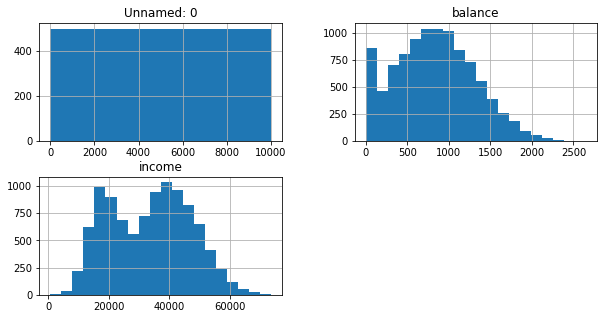

In [205]:
data.hist(bins=20,figsize=(10,5));

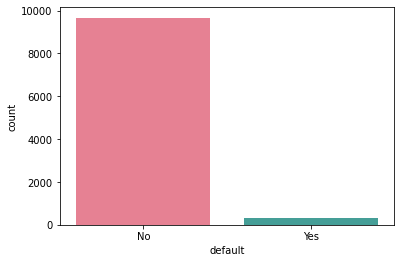

In [206]:
sns.countplot(x="default", data=data, palette='husl');

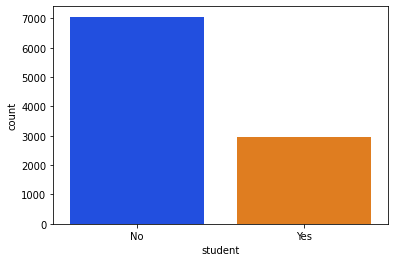

In [207]:
sns.countplot(x="student", data=data, palette='bright');

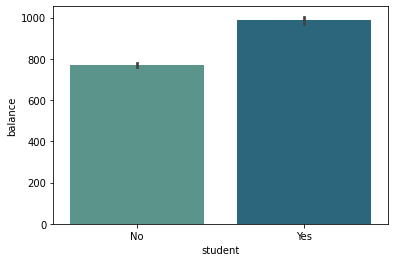

In [208]:
sns.barplot(y='balance',x='student',data=data,palette='crest')

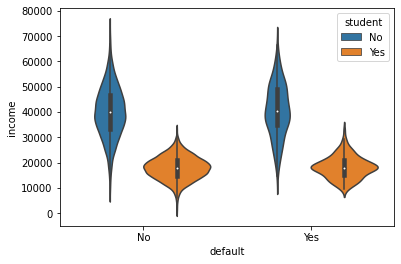

In [209]:
sns.violinplot(y='income',x='default',hue='student',data=data)

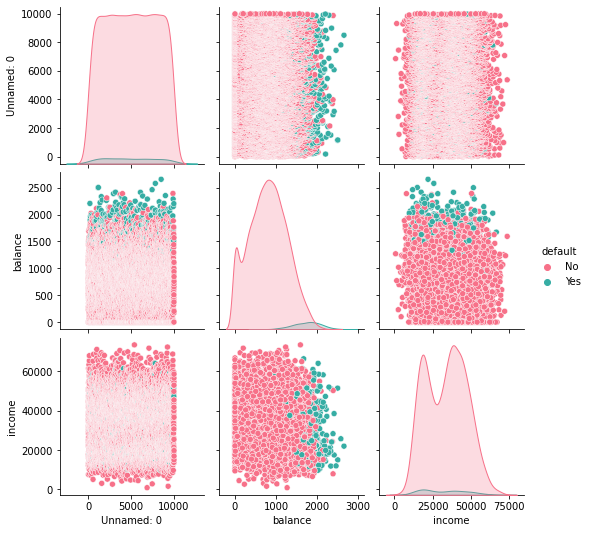

In [210]:
sns.pairplot(data, hue="default", palette="husl");

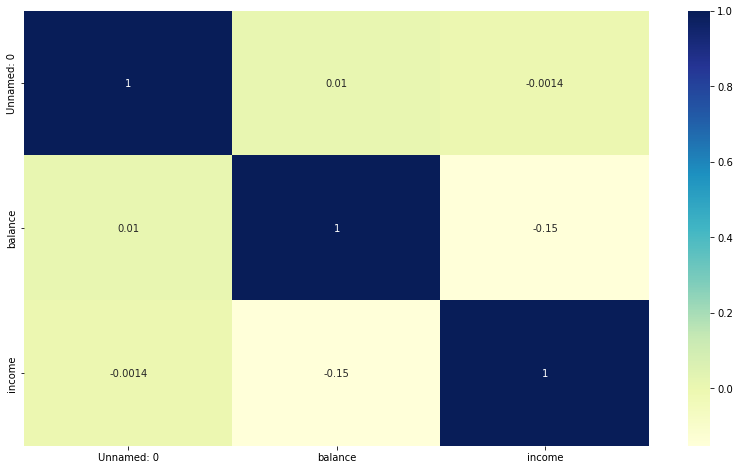

In [211]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## **•	Prepare data to be able to build a classification model**

In [212]:
#dropping unwanted columns
data.drop(['Unnamed: 0'], inplace = True , axis =1)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [214]:
#checking for nul values
print(data.isnull().values.any())

False


In [215]:
x = data.drop("default",axis=1)
y = data["default"]

In [216]:
x

,student,balance,income
0,No,729.526495,44361.62507
1,Yes,817.180407,12106.13470
2,No,1073.549164,31767.13895
3,No,529.250605,35704.49394
4,No,785.655883,38463.49588
...,...,...,...
9995,No,711.555020,52992.37891
9996,No,757.962918,19660.72177
9997,No,845.411989,58636.15698
9998,No,1569.009053,36669.11236


In [217]:
y

0       No
1       No
2       No
3       No
4       No
        ..
9995    No
9996    No
9997    No
9998    No
9999    No
Name: default, Length: 10000, dtype: object

In [218]:
#encoding categorical variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [219]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)

In [220]:
data.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


## **•	Bring the train and test data in the required format**

---



In [242]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=0)

## **•	Perform missing values check**

In [243]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

## **•	Perform scaling of data**

In [244]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **•	Print the shapes of train and test data**

In [245]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (7500, 4)
x_test (2500, 4)
y_train (7500,)
y_test (2500,)


# **3.	Random Forest Classifier Model Building (0.5*3 = 1.5 marks)**

## **•	Build a random forest classification model**

In [246]:
rf_cl = RandomForestClassifier(n_estimators=50,random_state = 0, n_jobs =-1)

## **• Train the model on the train dataset¶**

In [247]:
rf_cl.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

## **•	Print the model summary**

In [248]:
y_pred_rf = rf_cl.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [266]:
print("The accuracy_score ",accuracy_score(y_test,y_pred_rf))

The accuracy_score  0.9676


# **5.	Model Evaluation (1 + 1 = 2 marks)**

# **•	Check the random forest classifier model’s performance by printing accuracy, confusion matrix, F1 score and the AUC-ROC curve**

The confusion matrix is 
 [[2387   17]
 [  64   32]]


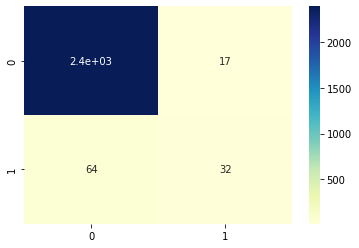

In [267]:
cm = confusion_matrix(y_test,y_pred_rf)
print("The confusion matrix is \n",cm)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [268]:
print("The accuracy_score ",accuracy_score(y_test,y_pred_rf))

The accuracy_score  0.9676


In [269]:
print("The classification_report is \n", classification_report(y_test,y_pred_rf))

The classification_report is 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2404
           1       0.65      0.33      0.44        96

    accuracy                           0.97      2500
   macro avg       0.81      0.66      0.71      2500
weighted avg       0.96      0.97      0.96      2500



In [255]:
y_scores_rf = cross_val_predict (rf_cl,x_test,y_test,cv=8)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_scores_rf)
roc_auc_rf = roc_auc_score(y_test,y_scores_rf)
print ("The ROC-AUC Score for Random Forest Classifier is ",roc_auc_rf )


The ROC-AUC Score for Random Forest Classifier is  0.6925090127565169


Text(0.5, 0, 'False Positive Rate')

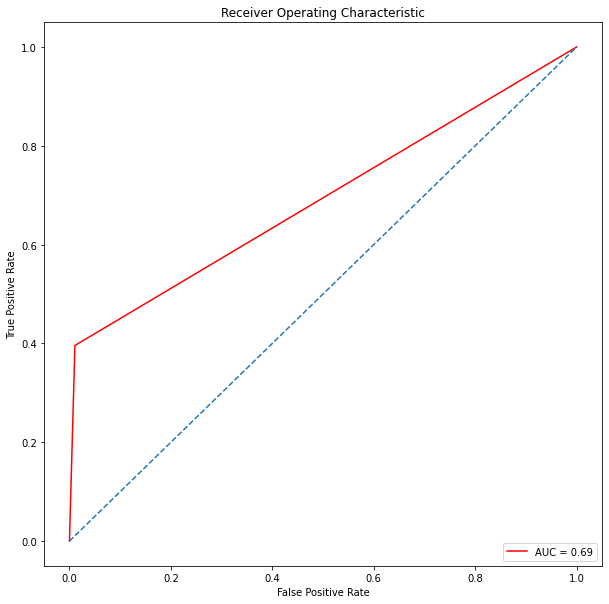

In [256]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label ='AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#**4.	XGBoost Classifier Model Building (0.5*3 = 1.5 marks)** 

## **•	Build a XGBoost classification Model**

In [257]:
xgb_cl = XGBClassifier()

## **• Train the model on the train dataset**

In [270]:
xgb_cl.fit(x_train,y_train)

XGBClassifier()

## **• Print the model summary**

In [271]:
y_pred_xgb = xgb_cl.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [272]:
print("The accuracy_score ",accuracy_score(y_test,y_pred_xgb))

The accuracy_score  0.9724


# **5.	Model Evaluation (1 + 1 = 2 marks)**

##**•	Check the XGBoost classification model performance by printing accuracy, confusion matrix, F1 score and the AUC-ROC curve**

The confusion matrix is 
 [[2397    7]
 [  62   34]]


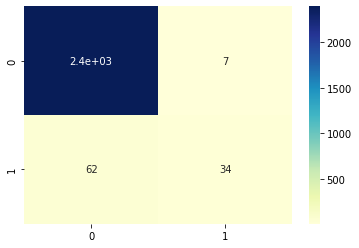

In [273]:
cm = confusion_matrix(y_test,y_pred_xgb)
print("The confusion matrix is \n",cm)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [274]:
print("The accuracy_score ",accuracy_score(y_test,y_pred_xgb))

The accuracy_score  0.9724


In [275]:
print("The classification_report is \n", classification_report(y_test,y_pred_xgb))

The classification_report is 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2404
           1       0.83      0.35      0.50        96

    accuracy                           0.97      2500
   macro avg       0.90      0.68      0.74      2500
weighted avg       0.97      0.97      0.97      2500



In [276]:
y_scores_xgb = cross_val_predict (xgb_cl,x_test,y_test,cv=8)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_scores_xgb)
roc_auc_xgb = roc_auc_score(y_test,y_scores_xgb)
print ("The ROC-AUC Score for XGBoost Classifier is ",roc_auc_xgb )


The ROC-AUC Score for XGBoost Classifier is  0.6893805463117028


Text(0.5, 0, 'False Positive Rate')

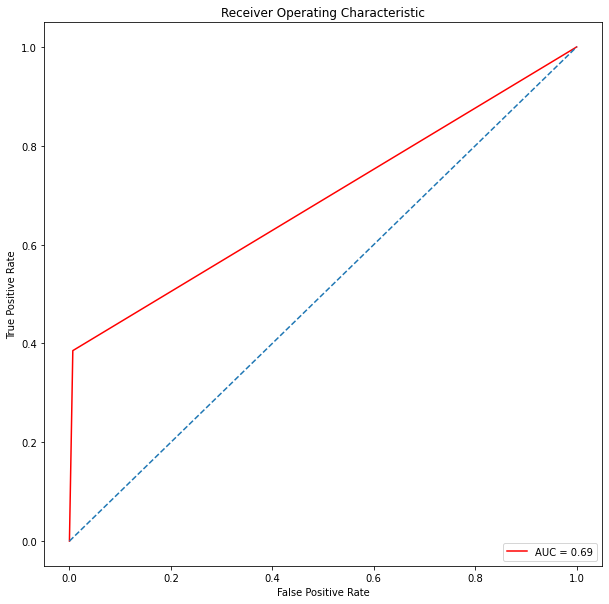

In [265]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label ='AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# **6.	Compare the performance of random forest classification and XGBoost classification models for given dataset (1 mark)**

**On Comparing the performance of both the models, we came up with the following observations:**

  1. XGBoost Classifier model has the highest Accuracy score .
  2. XGBoost Classifier model has the highest F1 score .
  3. ROC-AUC Score is greater for Random Forest Classifier model. 

Here, Both the algorithms work efficiently and also prevents the model from getting over fitted and easy to implement.But while comparing the accuracy and other metrices, we can conclude that **XGBoost Classifier Model** performs well for the given data.

But, In case of noisy data, boosting models may overfit. In such cases, we can use Random Forest to provide better results than boosting models, as Random Forest model reduce variance.

# **Overall, XGboosting usually performs better than random forests but they're prone to overfitting; to avoid this, we need to remember to tune the parameters carefully.**
